# Outlier Detection Using Autoencoders

### What is Anamoly Detection? 
Anomaly detection is the process of finding abnormalities in data. Abnormal data is defined as the ones that deviate significantly from the general behavior of the data. Some of the applications of anomaly detection include fraud detection, fault detection, and intrusion detection. Anomaly Detection is also referred to as outlier detection.

### What is an AutoEncoder?
AutoEncoder is an unsupervised Artificial Neural Network that attempts to encode the data by compressing it into the lower dimensions (bottleneck layer) and then decoding the data to reconstruct the original input. The bottleneck layer holds the compressed representation of the input data.

During the process of dimensionality reduction 
outliers are identified
Outlier detection is a by-product of dimension 
reduction. Autoencoder techniques are efficient when the 
data problems are complex and non-linear in nature.
<br>
* Encoder accepts high-dimensional input data compress it down to the latent-space representation in the bottleneck hidden layer. Input size to an Encoder network is larger than its 
output size
* Decoder takes the latent representation of the data as 
an input to reconstruct the original input data. Output size of a Decoder network is larger than its 
input size.

* Requirement is that the dimensionality of the input and output 
should be the same
* Middle layers can have any dimension



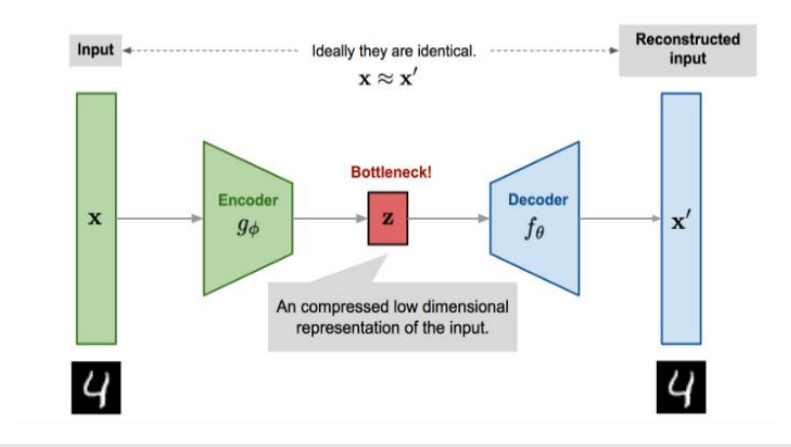

### Application of Autoencoders

* Dimensionality Reduction
* The Encoder encodes the input into the hidden layer to 
reduce the dimensionality of linear and nonlinear data
* Anomaly Detection: Autoencoders tries to minimize the reconstruction error 
as part of its training. Anomalies are detected by checking the magnitude of 
the reconstruction loss
* Denoising Images: An image that is corrupted can be restored to its original 
version
* Image recognition
* Image generation

We are using the anamoly detection application of autoencoders here.

### Process:

* During the training, input normal samples to the 
encoder
* Bottleneck layer learns the latent representation of the 
normal input data
* Decoder uses bottleneck layer output to reconstruct 
the normal samples of the input data
* Outlier is different from a normal samples
* Autoencoder has trouble reconstructing the outlier 
* hence the reconstruction error is high
* Flag sample as an oultlier based on a specified 
threshold value for the reconstruction error


In [ ]:
# Anamoly Detection using Autoencoders code using ecg dataset:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path='http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'

In [ ]:
data=pd.read_csv(path, header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [ ]:
features=data.drop(140,axis=1)
labels=data[140]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,stratify=labels)  #stratified sampling...equal distribution


In [ ]:
# Extracting Normal samples 1st
train_index=y_train[y_train==1].index  # find sequence no. of samples where y_train=1
train_data=x_train.loc[train_index]  # not considering y_train=0

In [ ]:
# for normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train_scaled=scaler.fit_transform(train_data)
x_test_scaled=scaler.fit_transform(x_test)


In [ ]:
x_train_scaled.shape

(2335, 140)

In [ ]:
x_test_scaled.shape

(1000, 140)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# Creating the Layers in the Autoencoders
import keras

sh=x_train_scaled.shape
numb_features=sh[1]
# Encoder
input=keras.Input(shape=(numb_features,))
hidden1=Dense(64,activation='relu')(input)   #1st hidden layer
hidden1=Dropout(0.1)(hidden1)   # drops out 10 percent of neuron...6 here
hidden2=Dense(32,activation='relu')(hidden1)  #2nd hidden layer
hidden2=Dropout(0.1)(hidden2)
hidden3=Dense(16,activation='relu')(hidden2) 
hidden3=Dropout(0.1)(hidden2)
encoder=Dense(10,activation='relu')(hidden3) # Bottleneck Layer


# Decoder
hidden1=Dense(16,activation='relu')(encoder)   #1st hidden layer
hidden1=Dropout(0.1)(hidden1)   # drops out 10 percent of neuron...6 here
hidden2=Dense(32,activation='relu')(hidden1)  #2nd hidden layer
hidden2=Dropout(0.1)(hidden2)
hidden3=Dense(64,activation='relu')(hidden2) 
hidden3=Dropout(0.1)(hidden2)
decoder=Dense(numb_features,activation='sigmoid')(hidden3)


In [ ]:
model=keras.Model(input,decoder)
model.compile(loss='msle',metrics=['mse'],optimizer='adam') #minimum squared logarithimic Loss
history=model.fit(x_train_scaled,x_train_scaled,epochs=20,batch_size=512,validation_data=(x_test_scaled,x_test_scaled))

Epoch 1/20
5/5 [==============================] - 1s 47ms/step - loss: 0.0108 - mse: 0.0245 - val_loss: 0.0151 - val_mse: 0.0367
Epoch 2/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0105 - mse: 0.0236 - val_loss: 0.0151 - val_mse: 0.0365
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0100 - mse: 0.0225 - val_loss: 0.0151 - val_mse: 0.0364
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0094 - mse: 0.0211 - val_loss: 0.0151 - val_mse: 0.0363
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0087 - mse: 0.0195 - val_loss: 0.0148 - val_mse: 0.0355
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0080 - mse: 0.0180 - val_loss: 0.0148 - val_mse: 0.0353
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0074 - mse: 0.0165 - val_loss: 0.0144 - val_mse: 0.0344
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0068 - mse: 0.0152 - val

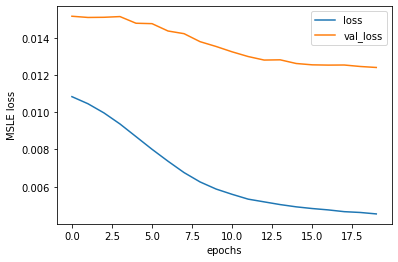

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('MSLE loss')
plt.legend(['loss','val_loss'])

In [ ]:
def threshold(mod,x_train_scaled):
  reconst=mod.predict(x_train_scaled)
  reconst_error=keras.losses.msle(reconst,x_train_scaled)
  th=np.percentile(reconst_error,95)
  return th


def pred(mod,x_test_scaled,th):
  pred=mod.predict(x_test_scaled)
  errors=keras.losses.msle(pred,x_test_scaled)   # error > threshold then anomaly
  anomaly=pd.Series(errors)>th
  predicted=anomaly.map(lambda x:0.0 if x==True else 1.0) #if x=0 then anomaly
  return predicted

In [ ]:
threshold_anomaly=threshold(model,x_train_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
predict_anomaly=pred(model,x_test_scaled,threshold_anomaly)
accuracy_score(predict_anomaly,y_test)


0.732

### Conclusion
For the given dataset, Autoencoder is used to detect Anomalies. Autoencoder uses 3 hidden layer for both encoder and decoder part. For the given Architecture Accuracy is 73.2 percent.<br>
If the number of neurons at bottle neck layer is increased then there is a slight increase in accuracy. To improve the accuracy, the no. of neurons in hidden layer or the no. of hidden layers can be increased.